The goal of the project is to analyse the Exit Surveys from Employees of Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.<br>
The questions to be answered at the end of the analysis are - <br>

    1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

    2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The datasets - 
dete_survey.csv 's couple of columns :

    ID: An id used to identify the participant of the survey
    SeparationType: The reason why the person's employment ended
    Cease Date: The year or month the person's employment ended
    DETE Start Date: The year the person began employment with the DETE
tafe_survey.csv 's couple of columns :

    Record ID: An id used to identify the participant of the survey
    Reason for ceasing employment: The reason why the person's employment ended
    LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In [436]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [437]:
df_dete = pd.read_csv('dete_survey.csv')
df_tafe = pd.read_csv('tafe_survey.csv')

In [438]:
df_dete.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [439]:
df_tafe.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [440]:
df_dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [441]:
df_tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [442]:
df_dete.isna().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [443]:
df_tafe.isna().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Looking at the data in Dete Survey we find, alot of the columns contain the value - 'Not Stated', This infact is NaN. Thus to rectify this, we read the dataset into pandas again with the na_values parameter set.

In [ ]:
df_dete = pd.read_csv('dete_survey.csv',na_values='Not Stated')

From the Dete Survey dataset the columns 'Professional Development' to 'Health & Safety' (28:49) are not required for the analysis. This data is general employee survey data regarding the employee's engagement with the company on the Likert scale.

In [381]:
df_dete.iloc[:,28:49].head(5)
df_dete.drop(columns=df_dete.columns[28:49],axis=1,inplace=True)

On similar line, in the Tafe Survey dataset, the columns 'Main Factor. Which of these was the main factor for leaving?' to 'Workplace. Topic:Would you recommend the Institute as an employer to others?' (17:66) are irrelevant to the analysis, as this data is of employee's engagement with the institute on the Likert scale.

In [382]:
df_tafe.iloc[:,17:66].head(5)
df_tafe.drop(columns=df_tafe.columns[17:66],axis=1,inplace=True)

Since we eventually want to combine the data for analysis, we have to clean the column names to bring uniformity.

In [383]:
columns = df_dete.columns.str.replace(" ","_").str.lower().str.strip()
df_dete.columns = columns

In [384]:
new_name = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

df_tafe.rename(new_name,inplace=True,axis=1)

The 'separatontype' column has the reason why an employee left. For the given analysis, the label 'Resignation' is relevant. Thus considering only those employees that resigned

In [62]:
df_dete.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [63]:
df_tafe.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [385]:
df_dete = df_dete[df_dete.separationtype.str.contains('Resignation')].copy()
df_tafe = df_tafe[df_tafe.separationtype == 'Resignation'].copy()

Looking at the 'cease_date' columns from both the dataset, we have to clean the Dete Survey 'cease_date's to make it uniform

In [113]:
df_tafe.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [10]:
df_dete.cease_date.value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [386]:
df_dete = df_dete[~df_dete.cease_date.isna()]

In [387]:
def clean_date(row):
    if '/' in row:
        return row.split('/')[1]
    else:
        return row

df_dete.cease_date = df_dete.cease_date.apply(clean_date).astype(float)

In [109]:
df_dete.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

For the end and start dates, we make the assumption that - The start dates shouldn't be greater than current date and the start date shouldn't be lesser than 1970 given that people start their jobs in their 20s.<br>
A box plot is a good way to catch outiers if any and to view general distribution of the data

In [13]:
df_dete.dete_start_date.value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1985.0     3
1986.0     3
1988.0     4
1989.0     4
1990.0     4
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     3
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     8
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    14
2006.0    12
2007.0    20
2008.0    22
2009.0    13
2010.0    17
2011.0    23
2012.0    20
2013.0    10
Name: dete_start_date, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


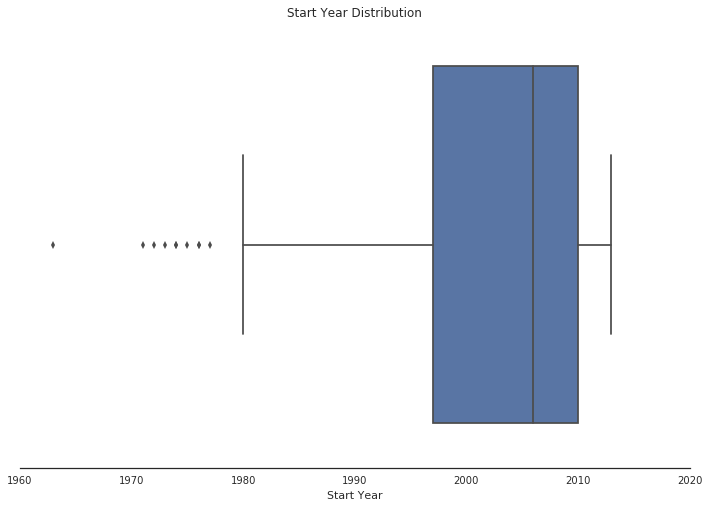

In [20]:
plt.figure(figsize=(12,8))
sns.set_style('white')
sns.boxplot(df_dete.dete_start_date)
plt.xlabel('Start Year')
plt.title("Start Year Distribution")
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

We can see that we have one entry with the year 1963, which seems to be the outlier here. The years starting from 1970 onwards, we can consider

In [388]:
df_dete = df_dete[~(df_dete.dete_start_date == 1963.0)]

The Tafe Survey dataset has the column 'institute_service' which describes the service years of employees. This column does not exist for the Dete Survery dataset. <br>
To deduce this column, 'cease_date' and 'dete_start_date' can be used. The rows with null values can be dropped

In [25]:
df_tafe.institute_service.value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [389]:
df_dete = df_dete[~df_dete.dete_start_date.isna()]

In [390]:
df_dete['institute_service'] = abs(df_dete.cease_date - df_dete.dete_start_date)

Now we have to classify which employees are dissatisfied. For this we have the following column relevant to us :
In the Tafe Survey dataset - 
    
    Contributing Factors. Dissatisfaction
    Contributing Factors. Job Dissatisfaction

In the Dete Survey dataset - 
    
    job_dissatisfaction
    dissatisfaction_with_the_department
    physical_work_environment
    lack_of_recognition
    lack_of_job_security
    work_location
    employment_conditions
    work_life_balance
    workload

We will create a new column, where if any of these criteria (above columns) is True then the employee was dissatisfied.

In [62]:
df_tafe[['Contributing Factors. Dissatisfaction'
        ,'Contributing Factors. Job Dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [149]:
df_dete[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False
22,False,True,False,True,False,False,False,True,False


In [391]:
print(df_tafe['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))

def clean_factors(row):
    if row == '-':
        return False
    elif pd.isnull(row):
        return np.NaN
    else:
        return True

df_tafe['Contributing Factors. Dissatisfaction'] = df_tafe['Contributing Factors. Dissatisfaction'].apply(clean_factors)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


In [392]:
print(df_tafe['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))
df_tafe['Contributing Factors. Job Dissatisfaction'] = df_tafe['Contributing Factors. Job Dissatisfaction'].apply(clean_factors)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [393]:
df_dete['dissatisfied'] = df_dete[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]].any(axis=1,skipna=False)

In [394]:
df_tafe['dissatisfied'] = df_tafe[[
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction'
]].any(axis=1,skipna=False)

We now have to combine the two dataframes 'df_dete' and 'df_tafe' to further analyse them. Before doing so, we add another column 'institute to differentiate between the two tupples. As well as make the column 'institute_service' uniform.

In [395]:
df_dete['institute'] = 'DETE'
df_tafe['institute'] = 'TAFE'

In [396]:
bins = pd.IntervalIndex.from_tuples([
    (0,1),(1,2),(3,4),(5,6),(7,10),(11,20),(20,100)
])
labels=['Less than 1 year',
           '1-2',
           '3-4',
           '5-6',
           '7-10',
           '11-20',
           'More than 20 years']

tmp = pd.cut(
    x=df_dete.institute_service,
    bins=bins
)

In [397]:
def assign_labels(row):
    if row == pd.Interval(0,1):
        return 'Less than 1 year'
    elif row == pd.Interval(1,2):
        return '1-2'
    elif row == pd.Interval(3,4):
        return '3-4'
    elif row == pd.Interval(5,6):
        return '5-6'
    elif row == pd.Interval(7,10):
        return '7-10'
    elif row == pd.Interval(11,20):
        return '11-20'
    else:
        return 'More than 20 years'

df_dete.institute_service = tmp.apply(assign_labels)

Before we concat the dataframes, we are going to keep only those columns that are important (common columns between the two)

In [398]:
relevant_cols = ['institute_service','gender','age','employment_status',
                'position','cease_date','dissatisfied','id',
                'separationtype','institute']

In [399]:
df_tafe = df_tafe[relevant_cols]
df_dete = df_dete[relevant_cols]

In [400]:
df = pd.concat([df_dete,df_tafe])

In [254]:
df.head(5)

,institute_service,gender,age,employment_status,position,cease_date,dissatisfied,id,separationtype,institute,service_catg
3,NaN,Female,36-40,Permanent Full-time,Teacher,2012.0,False,4.0,Resignation-Other reasons,DETE,NaN
5,11-20,Female,41-45,Permanent Full-time,Guidance Officer,2012.0,True,6.0,Resignation-Other reasons,DETE,Veteran
8,NaN,Female,31-35,Permanent Full-time,Teacher,2012.0,False,9.0,Resignation-Other reasons,DETE,NaN
9,11-20,Female,46-50,Permanent Part-time,Teacher Aide,2012.0,True,10.0,Resignation-Other employer,DETE,Veteran
11,NaN,Male,31-35,Permanent Full-time,Teacher,2012.0,False,12.0,Resignation-Move overseas/interstate,DETE,NaN


To better analyse the data, we will convert the 'institute_service' categories to the following:
    
    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

This was we have a more uniform and easy distinction between New employees and old ones.

In [401]:
def service_catgs(row):
    if row in ['Less than 1 year','1-2']:
        return 'New'
    elif row in ['3-4','5-6']:
        return 'Experienced'
    elif row == '7-10':
        return 'Established'
    elif pd.isnull(row):
        return np.NaN
    else:
        return 'Veteran'
    
df['service_catg'] = df.institute_service.apply(service_catgs)

Now that we have an aggregated dataset, we will now analyse the percentage dissatifaction in the categories of employees

In [402]:
print(df.dissatisfied.value_counts(dropna=False))
df.dissatisfied.fillna(False,inplace=True)

False    376
True     228
NaN        8
Name: dissatisfied, dtype: int64


In [403]:
catg_percent= df.pivot_table(
    values='dissatisfied',
    index='service_catg'
)
catg_percent.reset_index(inplace=True)
catg_percent

,service_catg,dissatisfied
0,Established,0.489796
1,Experienced,0.302326
2,New,0.265896
3,Veteran,0.488550


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


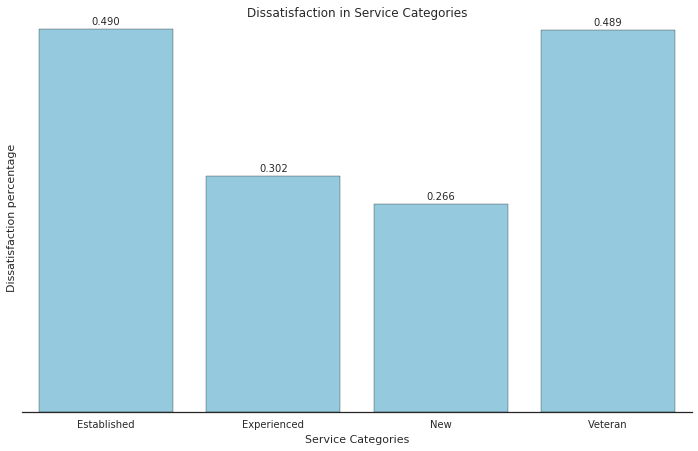

In [404]:
plt.figure(figsize=(12,7))
sns.set_style('white')
splt = sns.barplot(
    x='service_catg',
    y='dissatisfied',
    data=catg_percent,
    color='skyblue'
)
plt.yticks([])
plt.xlabel("Service Categories")
plt.ylabel("Dissatisfaction percentage")
plt.title("Dissatisfaction in Service Categories")
for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center'
                 )


Plotting the resulting percentages, we observe that employees of service categories - 'Established' and 'Veteran' are more dissatisfied than the other categories, and thus have resigned.

Let us now analyse by age group. But before we have to make the age column more readable and thus -

    Young: Aged 20 or younger to 30
    Middle: Aged 31 to 45
    Senior: Aged 46 to 55
    Elder: Aged 56 or older

Based on these categories, we are going to analyse which category is generally dissatisfied
    
    

In [405]:
df.age.value_counts(dropna=False)

51-55            69
NaN              52
41  45           45
41-45            44
46  50           39
36-40            36
46-50            34
21  25           33
31  35           32
26  30           32
36  40           32
26-30            31
56 or older      29
31-35            29
21-25            26
56-60            22
61 or older      17
20 or younger    10
Name: age, dtype: int64

In [406]:
df.age = df.age.str.replace("  ","-")
df.age = df.age.str.replace("56 or older","56-60")

def age_catg(row):
    if row in ['20 or younger','21-25','26-30']:
        return 'Young'
    elif row in ['31-35','36-40','41-45']:
        return 'Middle'
    elif row in ['46-50','51-55']:
        return 'Senior'
    elif pd.isna(row):
        return np.NaN
    else:
        return 'Elder'
    
df['age_catg'] = df.age.apply(age_catg)

In [407]:
print(df.age_catg.value_counts(dropna=False))

Middle    218
Senior    142
Young     132
Elder      68
NaN        52
Name: age_catg, dtype: int64


In [408]:
age_catg_percent = df.pivot_table(index='age_catg',values='dissatisfied')
age_catg_percent.reset_index(inplace=True)
age_catg_percent

,age_catg,dissatisfied
0,Elder,0.426471
1,Middle,0.376147
2,Senior,0.408451
3,Young,0.340909


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


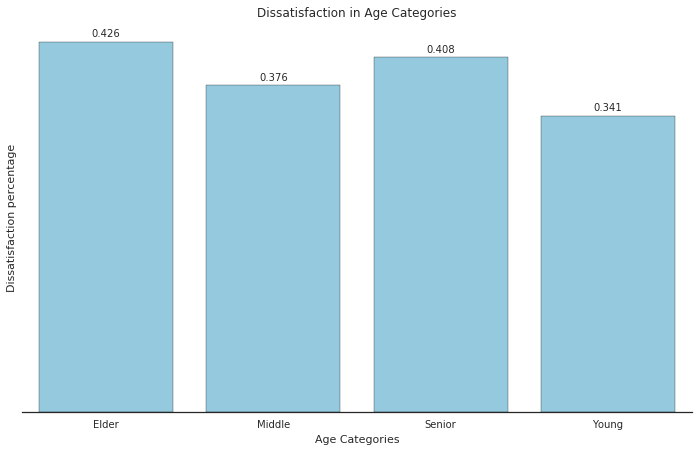

In [409]:
plt.figure(figsize=(12,7))
sns.set_style('white')
splt = sns.barplot(
    x='age_catg',
    y='dissatisfied',
    data=age_catg_percent,
    color='skyblue'
)
plt.yticks([])
plt.xlabel("Age Categories")
plt.ylabel("Dissatisfaction percentage")
plt.title("Dissatisfaction in Age Categories")
for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center'
                 )
#splt.annote("bar text",(loc_x,loc_y),ha(horizontal allign),va(vertical allign))


We can conclude from this plot that an Elder or Senior aged person is more dissatisfied and have resigned.

Between the two institutions - DETE and TAFE, let us analyse which one has higher resignation due to dissatisfaction.

In [413]:
df.institute.value_counts(dropna=False)

TAFE    340
DETE    272
Name: institute, dtype: int64

In [417]:
institute_catg = df.pivot_table(index='institute',values='dissatisfied')
institute_catg.reset_index(inplace=True)
institute_catg

,institute,dissatisfied
0,DETE,0.503676
1,TAFE,0.267647


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


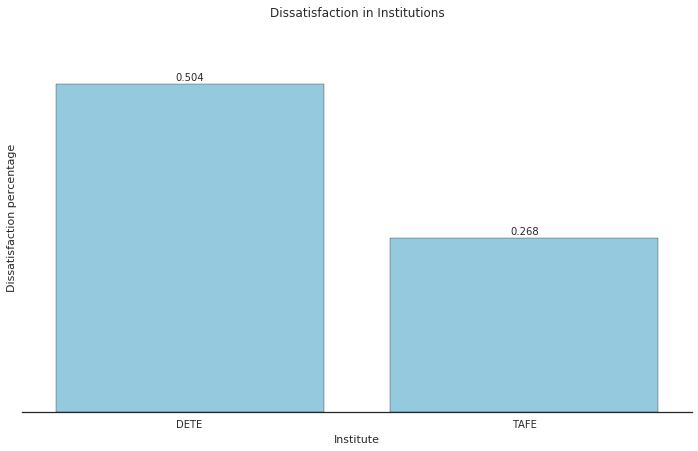

In [419]:
plt.figure(figsize=(12,7))
sns.set_style('white')
splt = sns.barplot(
    x='institute',
    y='dissatisfied',
    data=institute_catg,
    color='skyblue'
)
plt.yticks([])
plt.xlabel("Institute")
plt.ylabel("Dissatisfaction percentage")
plt.title("Dissatisfaction in Institutions")
for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center'
                 )
#splt.annote("bar text",(loc_x,loc_y),ha(horizontal allign),va(vertical allign))


We can conclude that the employees from DETE have a higher attrition rate due to dissatisfaction.

Viewing the dataset, we can analyse the dissatisafaction based on the type of Employment as well, the categories are made simpler as -

    Permanent: Permanent Full-time / Part-time
    Temporary: Temporary Full-time / Part-time
    Casual: Contract / Casual
    
Based on these new categories we will analyse the resignation due to dissatisfaction percentage.

In [422]:
df.employment_status.value_counts(dropna=False)

Permanent Full-time    244
Permanent Part-time    130
Temporary Full-time    120
NaN                     50
Temporary Part-time     35
Contract/casual         29
Casual                   4
Name: employment_status, dtype: int64

In [428]:
def emp_status(row):
    if row in ['Permanent Full-time','Permanent Part-time']:
        return 'Permanent'
    elif row in ['Temporary Full-time','Temporary Part-time']:
        return 'Temporary'
    elif pd.isna(row):
        return np.NaN
    else:
        return "Casual"

df['employment_catg'] = df.employment_status.apply(emp_status)

In [429]:
emp_status_catg = df.pivot_table(
    index='employment_catg',
    values='dissatisfied'
)

emp_status_catg.reset_index(inplace=True)
emp_status_catg

,employment_catg,dissatisfied
0,Casual,0.181818
1,Permanent,0.459893
2,Temporary,0.232258


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


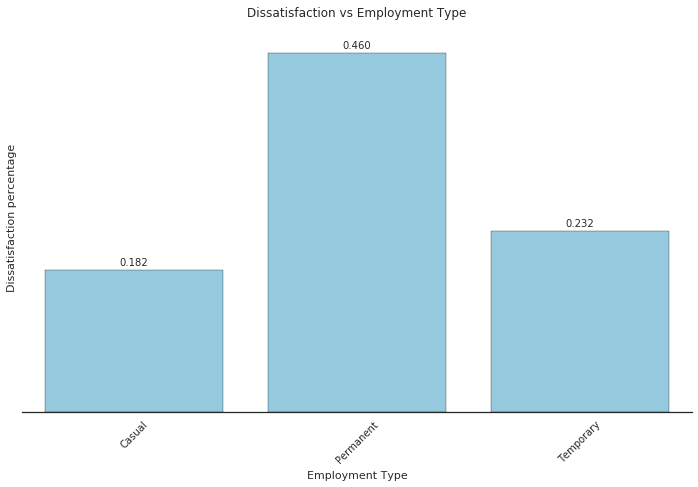

In [433]:
plt.figure(figsize=(12,7))
sns.set_style('white')
splt = sns.barplot(
    x='employment_catg',
    y='dissatisfied',
    data=emp_status_catg,
    color='skyblue'
)
plt.yticks([])
plt.xticks(rotation=45)
plt.xlabel("Employment Type")
plt.ylabel("Dissatisfaction percentage")
plt.title("Dissatisfaction vs Employment Type")
for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center'
                 )
#splt.annote("bar text",(loc_x,loc_y),ha(horizontal allign),va(vertical allign))


The plot above tells us that an Employee on a Permanent basis, whether Full-time or Part-time has higher resignation rate due to dissatisfaction.

In [434]:
df.head(5)

,institute_service,gender,age,employment_status,position,cease_date,dissatisfied,id,separationtype,institute,service_catg,age_catg,employment_catg
3,NaN,Female,36-40,Permanent Full-time,Teacher,2012.0,False,4.0,Resignation-Other reasons,DETE,NaN,Middle,Permanent
5,11-20,Female,41-45,Permanent Full-time,Guidance Officer,2012.0,True,6.0,Resignation-Other reasons,DETE,Veteran,Middle,Permanent
8,NaN,Female,31-35,Permanent Full-time,Teacher,2012.0,False,9.0,Resignation-Other reasons,DETE,NaN,Middle,Permanent
9,11-20,Female,46-50,Permanent Part-time,Teacher Aide,2012.0,True,10.0,Resignation-Other employer,DETE,Veteran,Senior,Permanent
11,NaN,Male,31-35,Permanent Full-time,Teacher,2012.0,False,12.0,Resignation-Move overseas/interstate,DETE,NaN,Middle,Permanent


To finally conclude we can categorize an employee that has resigned due to dissatisfaction. The 'Senior' or 'Elder' employees of service category 'Established' or 'Veteran' on a 'Permanent' basis have higher percentage of attrition due to dissatisfaction.